# 11/1: Files, sliding window.

## Warm-Up: Writing functions with strings.

Each problem below asks you to write a function involving strings. Keep in mind the concepts we've worked with: loops, methods, slices.

Our Python reference may be helpful ([link](https://cs.rhodes.edu/~superdockm/comp141/doc4/)).

(1) Write a function that tests whether a string representing a filename has a `.txt` extension (that is, whether the string ends with ".txt").

Hint: Use the `s.endswith()` method.

In [ ]:
# Determine if the given filename has a ".txt" extension.
# filename - A filename (str).
# Returns whether `filename` ends with ".txt" (bool).
def has_txt_extension(filename):
    pass

print(has_txt_extension('todo.txt'))   # True
print(has_txt_extension('party.txt'))  # True
print(has_txt_extension('report.pdf')) # False

(2) Write a function that takes a string representing a person's last name and checks the capitalization. Your function should return `True` if the name starts with a capital letter, and the remaining characters are lowercase letters.

Hint: Use a string slice to get the remaining characters.

In [ ]:
# Determine if the given name is correctly capitalized.
# name - A last name (str).
# Returns True if `name` starts with a capital letter,
#   and the remaining characters are lowercase letters.
# Returns False otherwise (bool).
def check_capitalization(name):
    pass

print(check_capitalization("kirlin"))    # False
print(check_capitalization("Sanders"))   # True
print(check_capitalization("SUPERdock")) # False

(3) Write a function that removes all whitespace characters (as defined by `s.isspace()`) from a string.

Hint: What kind of problem is this? (mapping? filtering? search? accumulation?)

In [ ]:
# Construct a copy of a string with all whitespace characters removed.
# s - Any string (str).
# Returns a copy of `s` with whitespace characters removed.
def remove_spaces(s):
    pass

print(remove_spaces("Hello World!")) # "HelloWorld!"
print(remove_spaces("a b c d"))      # "abcd"
print(remove_spaces("test"))         # "test"

## Example: Reading & writing with files

The following code reads from a file "students.txt" containing assignment scores, and computes the average grade:

In [ ]:
def main():
    
    # Create a "file object" representing a file in the filesystem.
    file = open('students.txt', 'r')
    
    count = 0
    total_grade = 0
    
    # Iterate through each line in the file.
    for line in file:
        
        # Strip the newline character from the end of `line`.
        line = line.rstrip()
        
        # Split `line` into a list of three string tokens.
        tokens = line.split(',')
        
        name = tokens[0]
        year = int(tokens[1])
        grade = int(tokens[2])
        
        count += 1
        total_grade += grade
        
    # Close the file.
    file.close()
       
    average_grade = total_grade / count
    
    print('Average grade: ' + str(average_grade))
    
main()

## The `file` type.

To this point, our programs have read input from the user (using `input()`) and written output to the user (using `print()`, or using graphics). But we can also write programs that interact with **files**. Python lets us do this using the `file` type, along with functions and methods that work with files.

`file` is a type:

- A `file` represents a file on your filesystem, open for either reading or writing.
  - When you're running a Python program on JupyterHub, this means files in your JupyterHub directory tree.
  - When you're running a Python program on your computer, this means files on your computer's hard drive.
- A `file` has a **mode** that determines which operations you're allowed to do. We'll only use two modes:
  - In **read mode**, you're only allowed to read from the file.
  - In **write mode**, you're allowed to write to the file.
- A `file` has a **position** that represents where you currently are in the file.
  - Each time you read/write some text, the position updates to the end of the text you just read/wrote.
  
We construct a `file` object using the `open()` function. Examples:

- `open('students.txt', 'r')` - Open a file called "students.txt" for reading. We look for the file in the same directory as the code file or notebook.
- `open('output.txt', 'w')` - Create and open a file called "output.txt" for writing. If "output.txt" already exists, delete its contents first.
- `open('students.txt')` - Open a file called "students.txt" for *reading*. (The default mode is reading mode.)
- `open('files/students.txt', 'r')` - Open a file called "students.txt" for reading, but look for the file within the `files` folder.

Python also provides **file methods** that we can use on a `file`. Let's learn about these by reading documentation:

[Python reference](https://cs.rhodes.edu/~superdockm/comp141/doc4/#files)

## Predict the output

Based on your reading of the Python reference, predict what will happen when you run each of the following code blocks:

Run the blocks to check your predictions.

In [ ]:
file = open('students.txt', 'r')

line1 = file.readline()
line2 = file.readline()
file.close()

print(line1)
print('--')
print(line2)

In [ ]:
file = open('students.txt')

line1 = file.readline()
rest = file.read()
file.close()

print(line1)
print('--')
print(rest)

In [ ]:
file = open('students.txt', 'r')

lines = file.readlines()
file.close()

print(lines)

In [ ]:
file = open('students.txt')

file.write('test')
file.close()

In [ ]:
file = open('test.txt', 'w')

file.write('Note to self: ')
file.write('Remember to close the file! ')

file.close()

In [ ]:
file = open('test.txt', 'w')

file.write('Note to self: ')
file.write('Remember to close the file! ')

## Files are not sequences

A file is not a sequence. For example, we cannot use indices with a file:

In [ ]:
file = open('students.txt')

print(file[1])
print(file[0])

## Files support for-loops

But we *can* use a for-loop with a file! For example:

In [ ]:
file = open('students.txt')

for line in file:
    print(line)
    
file.close()

How does this for-loop work?

- Set `line` equal to the first line of the file (including the newline character).
- Execute the body.
- Set `line` equal to the next line of the file (including the newline character).
- Execute the body.

...

- Set `line` equal to the last line of the file (including the newline character).
- Execute the body.

Even though files don't support the operation of getting the `i`th item (indexing), they do support the operation of getting the next item.

## Iterable types

An **iterable type** is a type supporting some concept of "getting the next item."

- `list`, `str`, and `range` are all iterable.
  - More generally, *any* sequence type is iterable.
- `file` is iterable.
  - The concept of "getting the next item" is provided by the `f.readline()` function.

We can write a for-loop over any iterable type (not just a sequence type).

```
for [identifier] in [expression]:
    [block]
```

Earlier, we said that the expression above should evaluate to a *sequence type*. But actually, it can evaluate to *any iterable type*.

Here's a new picture of our types so far:

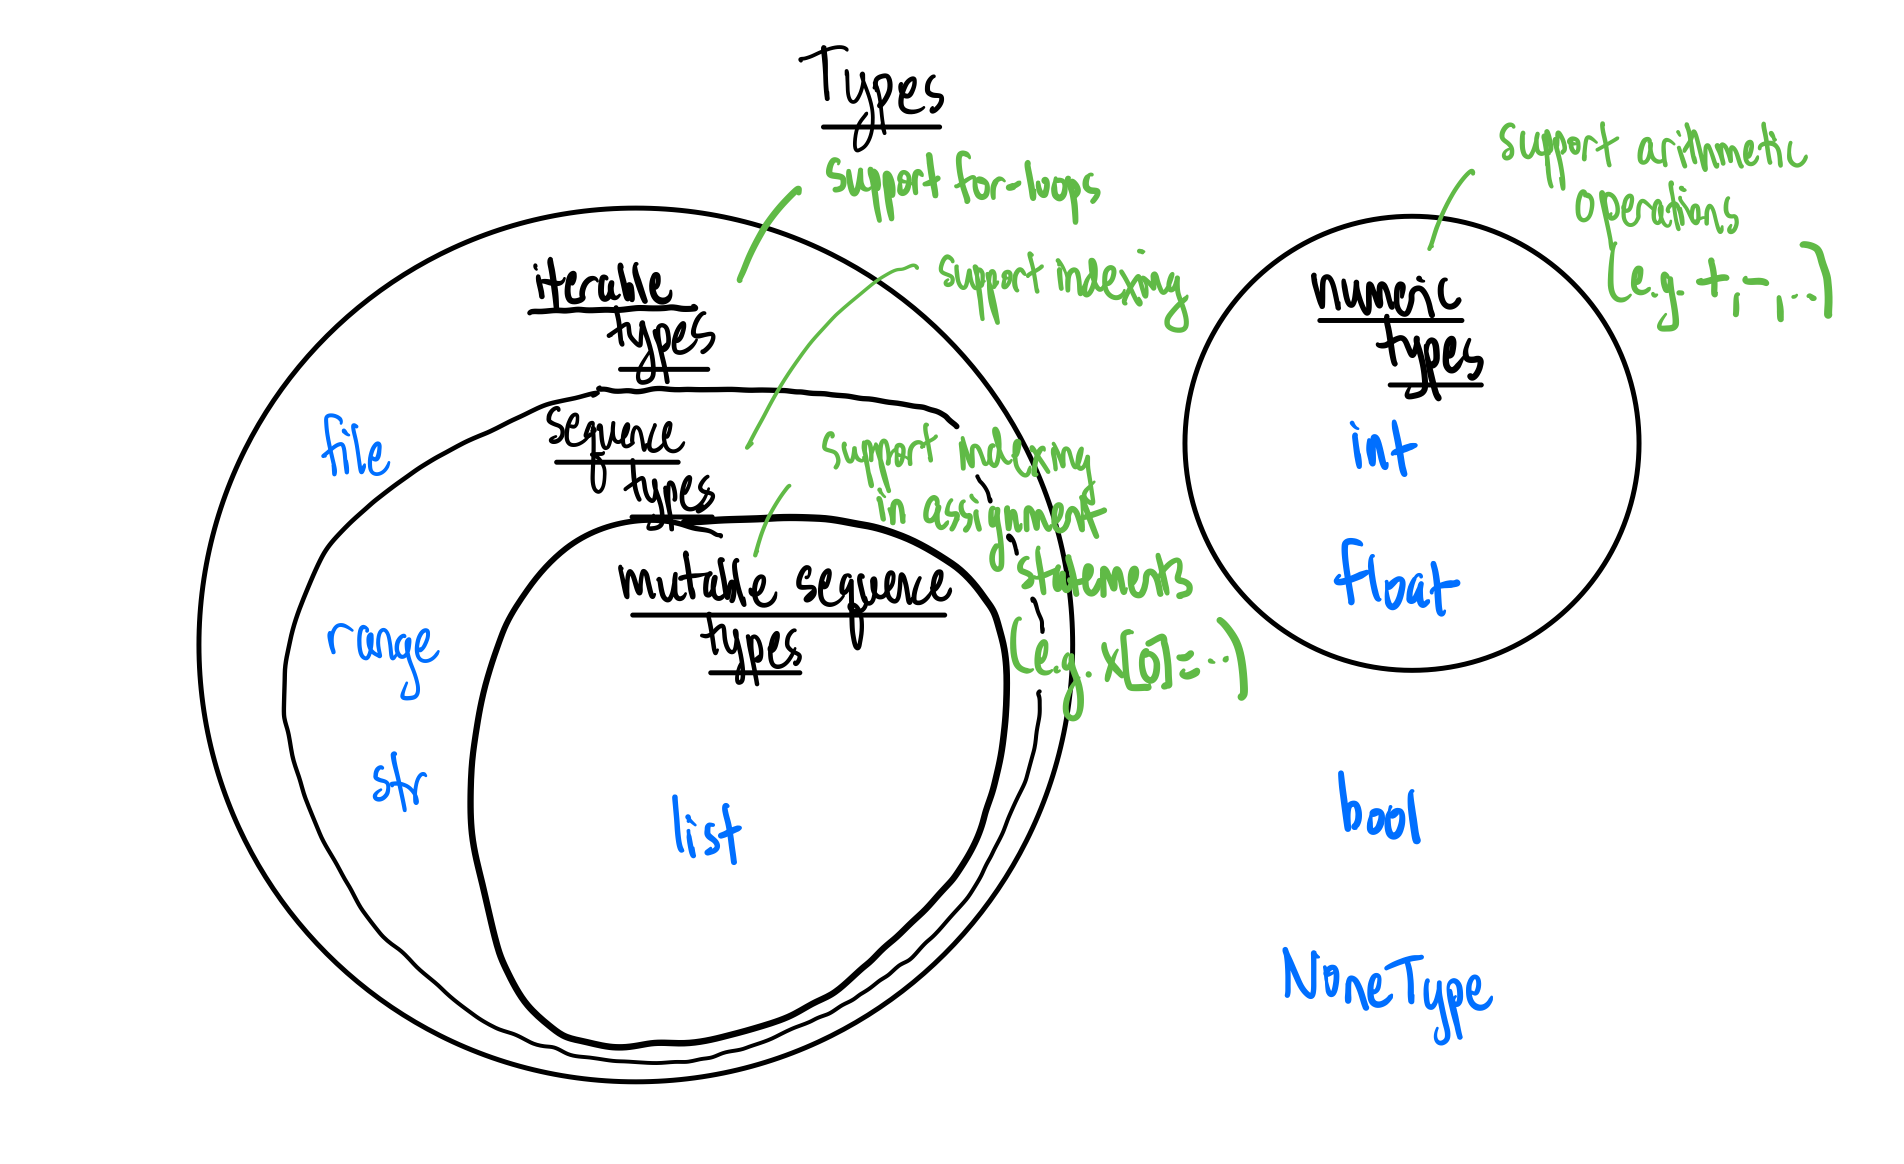

## The sliding window technique

The "sliding window technique" is the idea of storing a current value within a loop, so that you can access that value within the next iteration of the loop.

**Example:** The file "AAPL.csv" contains Apple stock prices for the past year. Count how many days the adjusted close increased from the previous day, and how many days the adjusted close decreased from the previous day.

In [ ]:
def main():
    pass
    
main()